**NAMA               : MUHAMMAD NAFISH ZALDINANDA**

No. Registrasi : 1494037162101-1859

Program             : Fresh Graduate Academy Digital Talent Scholarship 2022 | Machine Learning Developer

Modul : Belajar Pengembangan Machine Learning



---

Proyek Akhir Image Classification Model Deployment :


1.   Dataset yang dipakai sebagai berikut : https://www.kaggle.com/datasets/hasibalmuzdadid/shoe-vs-sandal-vs-boot-dataset-15k-images
2.   Dataset yang akan dipakai bebas, namun minimal memiliki 1000 buah gambar.
1.   Dataset tidak pernah digunakan pada submission kelas machine learning sebelumnya.
2.   Dataset dibagi menjadi 80% train set dan 20% test set.
3.   Model harus menggunakan model sequential.
4.   Model harus menggunakan Conv2D Maxpooling Layer.
5.   Akurasi pada training dan validation set minimal sebesar 80%.
6.   Menggunakan Callback.
7.   Program dikerjakan pada Google Colaboratory
8.   Membuat plot terhadap akurasi dan loss model.
9.   Menulis kode untuk menyimpan model ke dalam format TF-Lite.





In [22]:
#Library yang Digunakan pada Pemodelan Ini
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import pathlib
import os
%matplotlib inline
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from google.colab import drive

In [2]:
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [23]:
#Pendefinisian Base Direktori yang berisi 3 Kelas (Shoe, Sandal, Boot)
base_dir = '/content/drive/My Drive/dataset/Shoe vs Sandal vs Boot Dataset'

In [24]:
print('Terdapat 3 Kelas yaitu : ')
os.listdir('/content/drive/My Drive/dataset/Shoe vs Sandal vs Boot Dataset')

Terdapat 3 Kelas yaitu : 


['Sandal', 'Shoe', 'Boot']

In [28]:
#Augmentasi Data Gambar beserta Pembagian Dataset dengan validation_split=0.2 atau 20% menggunakan ImageDataGenerator
train_datagen = ImageDataGenerator(
                rescale=1./255,
                rotation_range=45,
                horizontal_flip=True,
                vertical_flip=True,
                zoom_range =0.5,
                shear_range = 0.5,
                fill_mode = 'reflect',
                width_shift_range=0.5,
                height_shift_range=0.5,
                validation_split=0.2)

validation_datagen = ImageDataGenerator( 
                     rescale=1./255,
                     validation_split=0.2)

In [12]:
#Persiapan Data Training dan Data Validation menggunakan fungsi flow_from_directory()

train_generator = train_datagen.flow_from_directory(
          base_dir, 
          target_size = (100, 100), #Resize Gambar Menjadi 100x100 piksel
          shuffle = True,
          class_mode = 'categorical',
          subset = 'training',
          color_mode = 'rgb',
          batch_size = 64) 

validation_generator = validation_datagen.flow_from_directory(
          base_dir, 
          target_size = (100, 100), 
          class_mode = 'categorical', 
          subset = 'validation',
          color_mode = 'rgb', 
          batch_size = 64) 

Found 12009 images belonging to 3 classes.
Found 3002 images belonging to 3 classes.


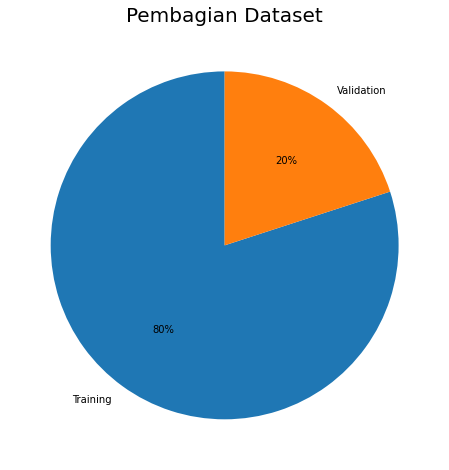

In [26]:
#Membuat Pie Plot untuk Pembagian Dataset
kategori = ['Training', 'Validation']
data = [len(train_generator), len(validation_generator)]

plt.figure(figsize = (12,8))
plt.pie(data, labels = kategori, autopct = '%d%%', startangle = 90)
plt.title('Pembagian Dataset', fontsize=20)
plt.show()

In [14]:
#Pembuatan Model CNN 

model = tf.keras.models.Sequential([
    # input_shape adalah Ukuran Gambar yaitu 100x100 pixel dengan 3 bytes color (RGB)
    tf.keras.layers.Conv2D(16, (3,3), activation = 'relu', input_shape = (100, 100, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3,3), activation = 'relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # Flatten Layer untuk mengubah gambar ke dalam bentuk array 1D
    tf.keras.layers.Flatten(),
    # 512 neuron Dense Layer Pertama
    tf.keras.layers.Dense(512, activation = 'relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(3, activation = 'softmax')
    # Terdapat 3 Output karena mengklasifikasi 3 kelas data (Shoe, Sandal, Boot) dengan fungsi aktivasi 'softmax'
])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 98, 98, 16)        448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 49, 49, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 47, 47, 64)        9280      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 23, 23, 64)       0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 33856)             0         
                                                                 
 dense (Dense)               (None, 512)               1

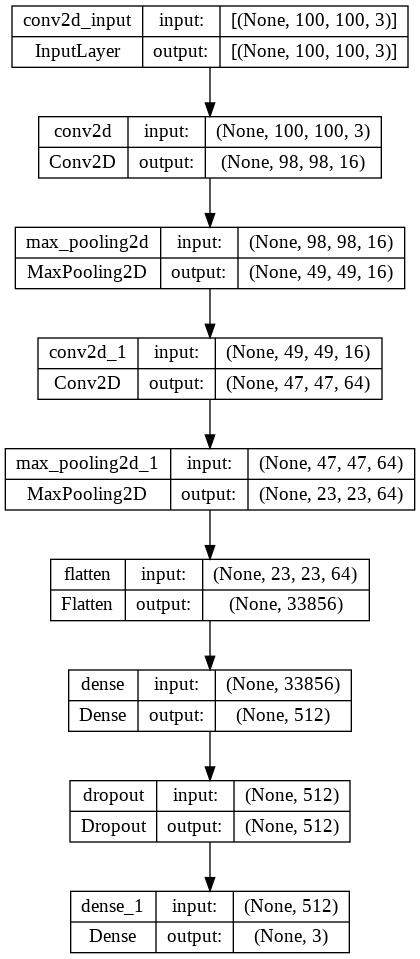

In [15]:
#Plot Pemodelan CNN
tf.keras.utils.plot_model(model, show_shapes = True)

In [16]:
# Model Compile
model.compile(loss = 'categorical_crossentropy', #Menggunakan Loss Function 'categorical_crossentropy' Karena klasifikasi Multilabel
              optimizer = tf.optimizers.Adam(),  #Optimizer yang digunakan Adam Optimizer
              metrics = ['accuracy'])            #Metrics berupa accuracy

In [17]:
#Menggunakan Fungsi Callback untuk Batasan pada Saat Pelatihan Model
class Callback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy') > 0.95 and logs.get('val_accuracy') > 0.95): #Pelatihan Model akan Berhenti ketika accuracy dan val_accuracy > 0.95
      self.model.stop_training = True
      
stopTraining = Callback()

In [18]:
#Pelatihan Model
history = model.fit(
      train_generator,
      epochs = 50,
      validation_data = validation_generator, 
      validation_steps = 5,
      steps_per_epoch=100,
      callbacks = [stopTraining],
      verbose = 2)

Epoch 1/50
100/100 - 61s - loss: 1.1727 - accuracy: 0.5117 - val_loss: 0.8005 - val_accuracy: 0.6531 - 61s/epoch - 612ms/step
Epoch 2/50
100/100 - 59s - loss: 0.7738 - accuracy: 0.6475 - val_loss: 0.5285 - val_accuracy: 0.7844 - 59s/epoch - 588ms/step
Epoch 3/50
100/100 - 64s - loss: 0.6678 - accuracy: 0.7044 - val_loss: 0.4885 - val_accuracy: 0.7906 - 64s/epoch - 640ms/step
Epoch 4/50
100/100 - 61s - loss: 0.6012 - accuracy: 0.7355 - val_loss: 0.4387 - val_accuracy: 0.8469 - 61s/epoch - 614ms/step
Epoch 5/50
100/100 - 58s - loss: 0.5450 - accuracy: 0.7659 - val_loss: 0.4508 - val_accuracy: 0.7844 - 58s/epoch - 583ms/step
Epoch 6/50
100/100 - 57s - loss: 0.5456 - accuracy: 0.7685 - val_loss: 0.3677 - val_accuracy: 0.8594 - 57s/epoch - 569ms/step
Epoch 7/50
100/100 - 59s - loss: 0.4938 - accuracy: 0.8019 - val_loss: 0.3634 - val_accuracy: 0.8438 - 59s/epoch - 587ms/step
Epoch 8/50
100/100 - 58s - loss: 0.4783 - accuracy: 0.8003 - val_loss: 0.3479 - val_accuracy: 0.8687 - 58s/epoch - 583

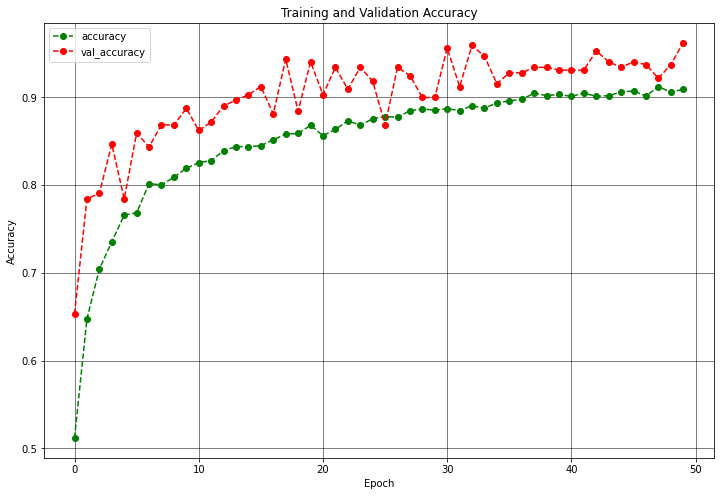

In [19]:
#Visualisasi Training dan Validation Accuracy pada Setiap Epoch
plt.figure(figsize = (12,8))
plt.title("Training and Validation Accuracy")
plt.plot(history.history['accuracy'],'go--')
plt.plot(history.history['val_accuracy'],'ro--')
plt.legend(['accuracy','val_accuracy'])
plt.grid(color ='k', linewidth = 0.5)
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.show()

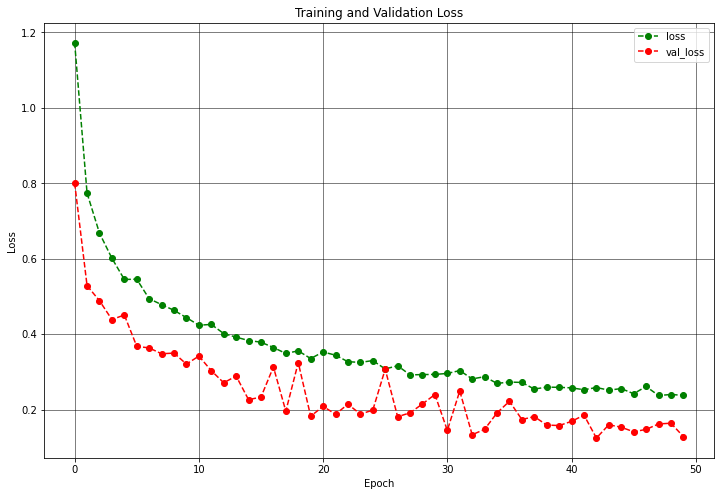

In [20]:
#Visualisasi Training dan Validation Loss pada Setiap Epoch
plt.figure(figsize = (12,8))
plt.title("Training and Validation Loss")
plt.plot(history.history['loss'],'go--')
plt.plot(history.history['val_loss'],'ro--')
plt.legend(['loss','val_loss'])
plt.grid(color ='k', linewidth =0.5)
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.show()

In [21]:
# Menyimpan model dalam format SavedModel
export_dir = 'saved_model/'
tf.saved_model.save(model, export_dir)
 
# Convert SavedModel menjadi footwear.tflite
converter = tf.lite.TFLiteConverter.from_saved_model(export_dir)
tflite_model = converter.convert()
 
tflite_model_file = pathlib.Path('footwear.tflite')
tflite_model_file.write_bytes(tflite_model)

69387512